# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import convolve, fftconvolve

# Playing with Spectrum

## Intro

In christmas eve I recorded a [vibration sound from a wine glass](https://youtu.be/80tmW5n5J-U).

I decided to try capturing the spectrum (FFT) from the audio.

## References

- [FFT with Scipy, RealPython](https://realpython.com/python-scipy-fft/)
- [FFT with Numpy](https://numpy.org/doc/stable/reference/routines.fft.html)
- [Visualization of FFT](https://canlab.github.io/_pages/tutorials/html/sin_cos_fft.html)

## Loading the File

In [ ]:
file_path = 'cup_sound.wav'
samplerate, data = wavfile.read(file_path)
duration = 25 # 25 seconds
# samples * sample_rate = recording length
# assert np.round(data.shape[0] / samplerate) == duration

<ipython-input-6-05fc329dc21c>:2: WavFileWarning: Reached EOF prematurely; finished at 1048576 bytes, expected 2193486 bytes from header.
  samplerate, data = wavfile.read(file_path)


### Visualization

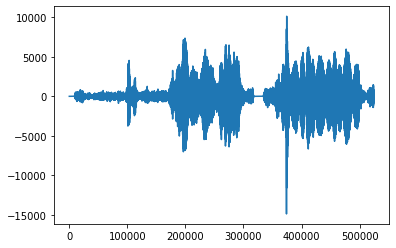

In [ ]:
plt.plot(data)

## Visualization

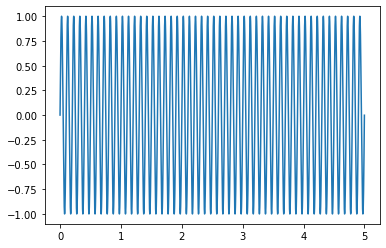

In [ ]:
sample_rate = 44100  # Hertz
duration_test = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 10 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(10, sample_rate, duration_test)
plt.plot(x, y)
plt.show()

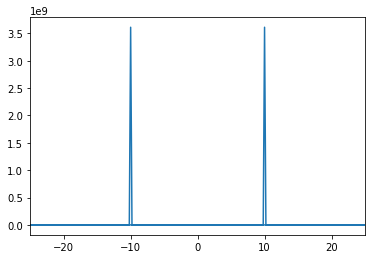

In [ ]:
normalized_tone = np.int16((y / y.max()) * 32767)

N = sample_rate * duration_test # Number of samples in normalized_tone

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / sample_rate)

plt.xlim((-25,25))
plt.plot(xf, np.abs(yf))
plt.show()

## For real now

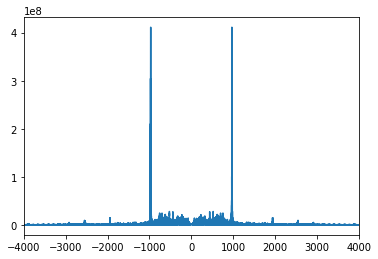

In [ ]:
norm_t = np.int16((data / data.max()) * 32767)
# Number of samples in normalized_tone
new_N = data.shape[0]

yf = fft(norm_t)
xf = fftfreq(new_N, 1 / samplerate)

lim_in_x = 4e3
plt.xlim((-lim_in_x,lim_in_x))
plt.plot(xf, np.abs(yf))
plt.show()

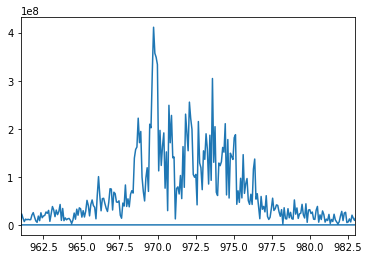

In [ ]:
lim_in_x = 5e3
plt.xlim((961,983))
plt.plot(xf, np.abs(yf))
plt.show()

This result is interesting. It shows the sound is made of two frequencies, basically. The same thing can be seen in [Chrome Music Lab - Spectrogram](https://musiclab.chromeexperiments.com/Spectrogram/).

# Impulse Responses

It is January 12th. I started googling Butterworth filters and remembered my good ol' Impulse Response experiments (I wanted to show Jhonathan how this stuff works). Guess what? I just found a library of [free reverb impulses](https://www.voxengo.com/impulses/). Maybe I didn't find something the first time because I was searching the wrong way. I guess I googled something like `impulse response cathedral`...

Whatever

When opening the IR file using `scipy.io.wavfile.read` I found it is a matrix. I think each column is a channel, and the audio is meant to be stereo. So, I'll take just one of the cols and that is it

In [ ]:
my_voice_file_path = 'mateus_e_samuel.wav'
#deep_space_path = 'Deep Space.wav'
#deep_space_path = 'St Nicolaes Church.wav'
deep_space_path = 'Large Long Echo Hall.wav'

my_voice_sample_rate, my_voice = wavfile.read(my_voice_file_path)
deep_space_sample_rate, deep_space_effect = wavfile.read(deep_space_path)
#assert deep_space_sample_rate == my_voice_sample_rate

In [ ]:
my_voice_sample_rate

48000

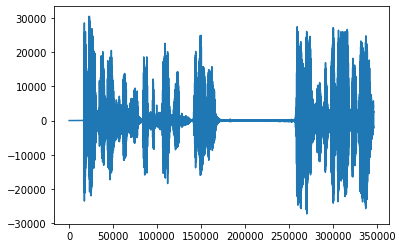

In [ ]:
plt.plot(my_voice)

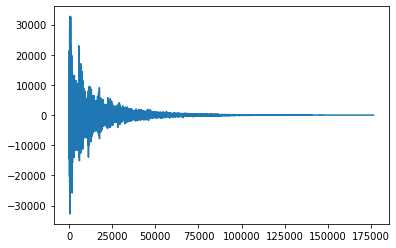

In [ ]:
plt.plot(deep_space_effect[:,0])

In [ ]:
voice_deep_space = fftconvolve(my_voice,deep_space_effect[:,0])

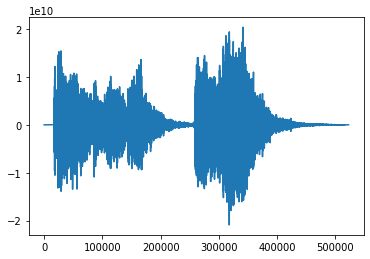

In [ ]:
plt.plot(voice_deep_space)

[Creating a `.wav` file](https://stackoverflow.com/questions/10357992/how-to-generate-audio-from-a-numpy-array)

In [ ]:
rate = 44100
scaled = np.int16(voice_deep_space / np.max(np.abs(voice_deep_space)) * 32767)
wavfile.write('mateus_e_sam_ecoado.wav', rate, scaled)